# Project 5: Healthcare Insurance Analysis

# Prefactory Remarks

- [x] **Create a virtual environment to download the packages**

In [ ]:
# You don't have to do this, it's just safer.

# Install virtualenv (virtual environment):

# !pip install virtualenv

# Create a virtual environment named "myenv":

# !python -m venv myenv

# Activate the virtual environment:

# myenv\Scripts\activate (Windows)
# source myenv/bin/activate (macOS/Linux)

# Upgrade pip and install essential data science libraries inside the virtual environment:

# !myenv/bin/python -m pip install --upgrade pip  
# !myenv/bin/python -m pip install numpy pandas matplotlib seaborn scikit-learn scipy statsmodels jupyterlab plotly openpyxl xlrd tensorflow keras torch torchvision pyspark ipykernel

# Add the virtual environment as a Jupyter kernel:

# !myenv/bin/python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

# Deactivate the virtual environment (Run this in the terminal):

# deactivate

- [x] **Libraries we might need to install or upgrade**

In [ ]:
# If you don't care to create a virtual environment, here is what you need to do to download the libraries

# Run these directly in a cell to download the libraries:

#!pip install tensorflow
#!pip install pyspark
#!pip install scikit-optimize (for skopt)
#!pip install missingno
#!pip install seaborn
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn

# To update them, run this (with your desired library):

#!pip install --upgrade scikit-learn

- [x] **Tips for rearranging your Notebook**

- Hold ctrl+shift and click on the various cells you want to move, then press the arrow keys to move them up or down.

# Data Analysis (Using the Pandas Library)

## 1. Visualize the data

- [x] **View the data**

In [1]:
import pandas as pd
import numpy as np
import math as ma
import re
import matplotlib.pyplot as plt
import seaborn as sns

df_i = pd.read_csv("insurance.csv")
df_v = pd.read_csv("validation_dataset.csv")

df_i

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,Northwest,$10600.5483
1334,-18.0,female,31.920,0.0,no,Northeast,2205.9808
1335,18.0,female,36.850,0.0,no,southeast,$1629.8335
1336,21.0,female,25.800,0.0,no,southwest,2007.945


- [x] **Check the data types**

In [6]:
df_v.dtypes
df_i.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges      object
dtype: object

- [x] **Count Occurrences**

In [124]:
df_i = pd.read_csv("insurance.csv")
df_v = pd.read_csv("validation_dataset.csv")

df_v["sex"].value_counts()

# We can do all of them instead of one by one:

for column in df_i.columns:
    print(f"Value counts for {column}:\n{df_v[column].value_counts()}\n{'-'*40}\n")  # something wrong here

Value counts for age:
age
18.0    3
27.0    3
29.0    3
28.0    2
70.0    2
19.0    2
63.0    2
44.0    2
57.0    2
92.0    2
46.0    1
74.0    1
45.0    1
43.0    1
52.0    1
78.0    1
40.0    1
35.0    1
89.0    1
26.0    1
58.0    1
21.0    1
23.0    1
47.0    1
33.0    1
49.0    1
39.0    1
55.0    1
84.0    1
83.0    1
20.0    1
60.0    1
51.0    1
48.0    1
42.0    1
71.0    1
61.0    1
Name: count, dtype: int64
----------------------------------------

Value counts for sex:
sex
female    25
male      25
Name: count, dtype: int64
----------------------------------------

Value counts for bmi:
bmi
38.060000    2
24.090000    1
38.600000    1
25.800000    1
25.740000    1
33.700000    1
32.395000    1
33.110000    1
20.235000    1
26.220000    1
24.700000    1
40.375000    1
66.370173    1
21.780000    1
35.720000    1
60.617535    1
34.400000    1
39.710000    1
27.200000    1
68.736874    1
32.490000    1
36.955000    1
84.973279    1
44.880000    1
65.454749    1
32.300000    1


KeyError: 'charges'

## 2. Reorganizing and Cleaning the Data

- [x] **Check for erronious values (age should be only positive integers equal or above 18, region should have consistent names, charges shouldn't have units missing, sex should only have Male or Female for consistency). Start with df_i.**

In [7]:
df_i = pd.read_csv("insurance.csv")

df_i["age"].value_counts()  # We see thatthey're all integers but we have negative ages, so let's use the absolute value function

def absolute_value(x):
    return abs(x)

df_i["age"]= df_i["age"].apply(absolute_value)

df_i["children"]= df_i["children"].apply(absolute_value)

df_i["age"].value_counts()

# Another way to do it is using the lambda function

df_i["age"] = df_i["age"].apply(lambda x: abs(x))

df_i["age"].value_counts()

# Now, let's fix the region

# df_i["region"].value_counts()  # Some of them are not properly capitalized, let's make it consistent

df_i["region"] = df_i["region"].str.capitalize()

df_i["region"].value_counts()

# The same for the smoker column

df_i["smoker"] = df_i["smoker"].str.capitalize()

df_i["smoker"].value_counts()

# Now let's see the charges column

df_i["charges"].value_counts()

df_i["charges"] = df_i["charges"].str.replace("$", "", regex=False)
df_i["charges"] = pd.to_numeric(df_i["charges"], errors="coerce")  # Converts to float, handling "$nan" as NaN

df_i.rename(columns={"charges": "charges (in American dollars)"}, inplace=True)

# Use imputation to fill in the NaN values (put the mean of the available values in the NaN slots)

df_i["charges (in American dollars)"] = df_i["charges (in American dollars)"].fillna(df_i["charges (in American dollars)"].mean())

df_i["charges (in American dollars)"]

df_i.rename(columns={"sex": "Gender"}, inplace=True)

df_i["Gender"] = df_i["Gender"].replace({"male": "Male", "man": "Male", "M": "Male", 
     "female": "Female", "woman": "Female", "F": "Female"})


- [x] **Check for NaN values in all of the columns. Use imputation (filling the NaN slots with the mean of the values available for that column) to fill the NaN slots.**

In [9]:
# Just like we've done in Project 4, let's use dictionaries

not_numbers = {}

for column in df_i.columns:
    not_numbers[column] = df_i[column].isna().sum()

print(not_numbers)

age_avg = df_i["age"].mean()

df_i["age"].fillna(age_avg, inplace=True)

df_i["age"].value_counts()

# Now, for the other two columns, we'll do it differently and faster:

df_i["bmi"].fillna(df_i["bmi"].mean(), inplace=True)
df_i["children"].fillna(df_i["children"].mean(), inplace=True)

# Function to fill missing categorical values randomly


def fill_randomly(df, column, options):
    df[column] = df[column].apply(lambda x: np.random.choice(options) if pd.isna(x) else x)

fill_randomly(df_i, "Gender", ["Male", "Female"])
fill_randomly(df_i, "smoker", ["Yes", "No"])
fill_randomly(df_i, "region", ["Southeast", "Southwest", "Northeast", "Northwest"])


print(df_i.isna().sum())  

# Now, everything is clean

{'age': 66, 'Gender': 66, 'bmi': 66, 'children': 66, 'smoker': 66, 'region': 66, 'charges (in American dollars)': 0}
age                              0
Gender                           0
bmi                              0
children                         0
smoker                           0
region                           0
charges (in American dollars)    0
dtype: int64


C:\Users\micro\AppData\Local\Temp\ipykernel_25328\1416264285.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_i["age"].fillna(age_avg, inplace=True)
C:\Users\micro\AppData\Local\Temp\ipykernel_25328\1416264285.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

- [x] **Check for missing values (empty slots). Use imputation (filling the NaN slots with the mean of the values available for that column) to fill the NaN slots.**

In [174]:

empty_values = {}

for column in df_i.columns:
    empty_values[column] = (df_i[column] == "").sum()

print(empty_values)

# Nothing wrong here

{'age': 0, 'Gender': 0, 'bmi': 0, 'children': 0, 'smoker': 0, 'region': 0, 'charges (in American dollars)': 0}


- [x] **Check for null values. Use imputation (filling the NaN slots with the mean of the values available for that column) to fill the NaN slots.**

In [176]:


not_null = {}

for column in df_i.columns:
    not_null[column] = df_i[column].isnull().sum()

print(not_null)

# It has been clean before

{'age': 0, 'Gender': 0, 'bmi': 0, 'children': 0, 'smoker': 0, 'region': 0, 'charges (in American dollars)': 0}


- [x] **Now, repeat for the df_v dataset. Fix the erred values.**

In [178]:

df_v = pd.read_csv("validation_dataset.csv")

df_v["age"].value_counts()  # We see thatthey're all integers but we have negative ages, so let's use the absolute value function

def absolute_value(x):
    return abs(x)

df_v["age"]= df_v["age"].apply(absolute_value)

df_v["children"]= df_v["children"].apply(absolute_value)

df_v["age"].value_counts()

# Another way to do it is using the lambda function

df_v["age"] = df_v["age"].apply(lambda x: abs(x))

df_v["age"].value_counts()

# Now, let's fix the region

# df_i["region"].value_counts()  # Some of them are not properly capitalized, let's make it consistent

df_v["region"] = df_v["region"].str.capitalize()

df_v["region"].value_counts()

# The same for the smoker column

df_v["smoker"] = df_v["smoker"].str.capitalize()

df_v["smoker"].value_counts()

df_v.rename(columns={"sex": "Gender"}, inplace=True)

df_v["Gender"] = df_v["Gender"].replace({"male": "Male", "man": "Male", "M": "Male", 
     "female": "Female", "woman": "Female", "F": "Female"})

df_v

,age,Gender,bmi,children,smoker,region
0,18.0,Female,24.090000,1.0,No,Southeast
1,39.0,Male,26.410000,0.0,Yes,Northeast
2,27.0,Male,29.150000,0.0,Yes,Southeast
3,71.0,Male,65.502135,13.0,Yes,Southeast
4,28.0,Male,38.060000,0.0,No,Southeast
5,70.0,Female,72.958351,11.0,Yes,Southeast
6,29.0,Female,32.110000,2.0,No,Northwest
7,42.0,Female,41.325000,1.0,No,Northeast
8,48.0,Female,36.575000,0.0,No,Northwest
9,63.0,Male,33.660000,3.0,No,Southeast


- [x] **Now, fix the NaN values.**

In [180]:
# Just like we've done in Project 4, let's use dictionaries

not_numbers = {}

for column in df_v.columns:
    not_numbers[column] = df_v[column].isna().sum()

print(not_numbers)

age_avg = df_v["age"].mean()

df_v["age"].fillna(age_avg, inplace=True)

df_v["age"].value_counts()

# Now, for the other two columns, we'll do it differently and faster:

df_v["bmi"].fillna(df_v["bmi"].mean(), inplace=True)
df_v["children"].fillna(df_v["children"].mean(), inplace=True)

# Function to fill missing categorical values randomly


def fill_randomly(df, column, options):
    df[column] = df[column].apply(lambda x: np.random.choice(options) if pd.isna(x) else x)

fill_randomly(df_v, "Gender", ["Male", "Female"])
fill_randomly(df_v, "smoker", ["Yes", "No"])
fill_randomly(df_v, "region", ["Southeast", "Southwest", "Northeast", "Northwest"])


print(df_v.isna().sum())  

# Now, everything is clean

{'age': 0, 'Gender': 0, 'bmi': 0, 'children': 0, 'smoker': 0, 'region': 0}
age         0
Gender      0
bmi         0
children    0
smoker      0
region      0
dtype: int64


C:\Users\micro\AppData\Local\Temp\ipykernel_4680\2634443928.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_v["age"].fillna(age_avg, inplace=True)
C:\Users\micro\AppData\Local\Temp\ipykernel_4680\2634443928.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

- [x] **Rearranje and Rename Columns**

In [11]:
# Let's capitalize all of the colmn names

df_i.columns = df_i.columns.str.title()

df_v.columns = df_v.columns.str.title()

df_i

,Age,Gender,Bmi,Children,Smoker,Region,Charges (In American Dollars)
0,19.0,Female,27.900,0.0,Yes,Southwest,16884.92400
1,18.0,Male,33.770,1.0,No,Southeast,1725.55230
2,28.0,Male,33.000,3.0,No,Southeast,4449.46200
3,33.0,Male,22.705,0.0,No,Northwest,21984.47061
4,32.0,Male,28.880,0.0,No,Northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,Male,30.970,3.0,No,Northwest,10600.54830
1334,18.0,Female,31.920,0.0,No,Northeast,2205.98080
1335,18.0,Female,36.850,0.0,No,Southeast,1629.83350
1336,21.0,Female,25.800,0.0,No,Southwest,2007.94500


- [x] **Save this clean file**

In [ ]:
df_i.to_csv("clean_insurance.csv", index=False)
df_v.to_csv("clean_validation_dataset.csv", index=False)

## 3. Exploratory Data Analysis and Visualizations

- [x] **Check the distribution of ages by creating a histogram for that column**

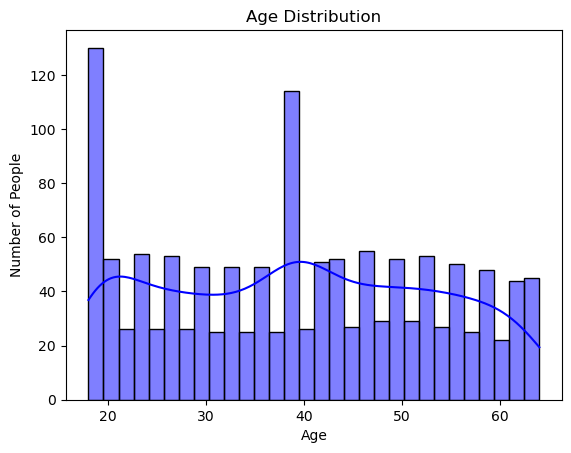

In [89]:
sns.histplot(df_i["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.ylabel("Number of People")
plt.xlabel("Age")
plt.show()

- [x] **Check the distribution of charges by creating a histogram for that column**

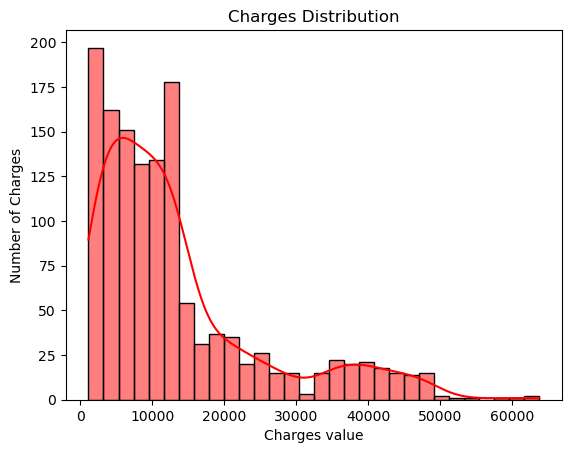

In [107]:
sns.histplot(df_i["Charges (In American Dollars)"], bins=30, kde=True, color="red")
plt.title("Charges Distribution")
plt.ylabel("Number of Charges")
plt.xlabel("Charges value")
plt.show()

- [x] **Check the distribution of children by creating a histogram for that column**

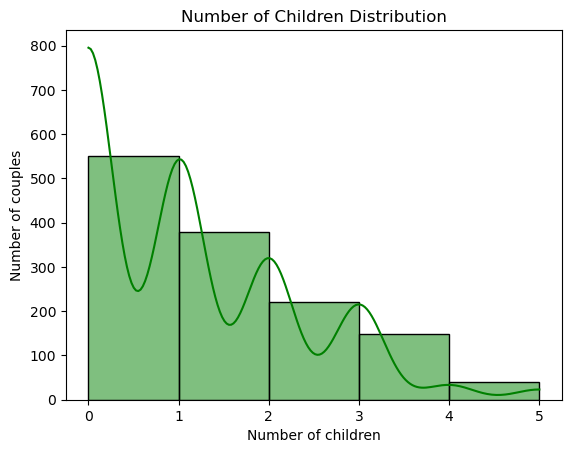

In [13]:
sns.histplot(df_i["Children"], bins=5, kde=True, color="green")
plt.title("Number of Children Distribution")
plt.ylabel("Number of couples")
plt.xlabel("Number of children")
plt.show()

- [x] **Create a plot for the gender disribution**

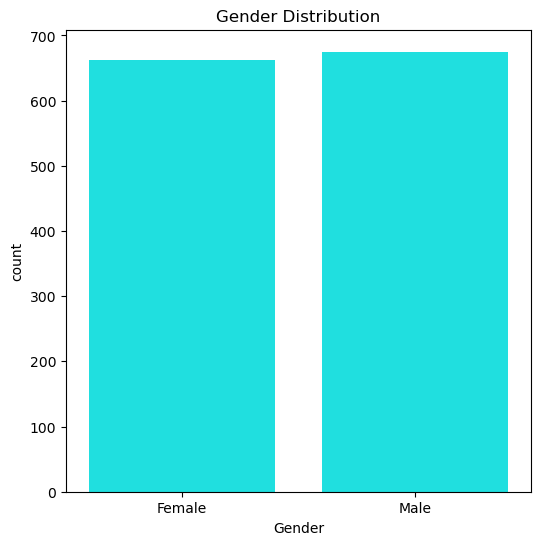

In [109]:
plt.figure(figsize=(6,6))
sns.countplot(x="Gender", data=df_i, color="cyan")
plt.title("Gender Distribution")
plt.show()

- [x] **Check if insurance charges differ by region.**

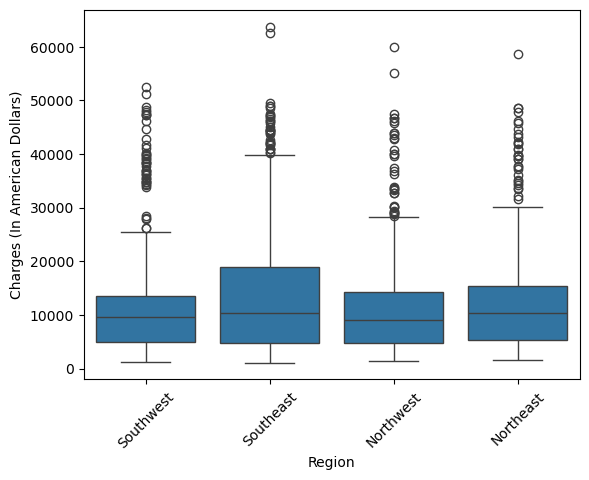

In [79]:
sns.boxplot(x=df_i["Region"], y=df_i["Charges (In American Dollars)"])
plt.xticks(rotation=45)
plt.show()


- [x] **Is BMI higher for smokers? Do a boxplot for the smoker and bmi columns**

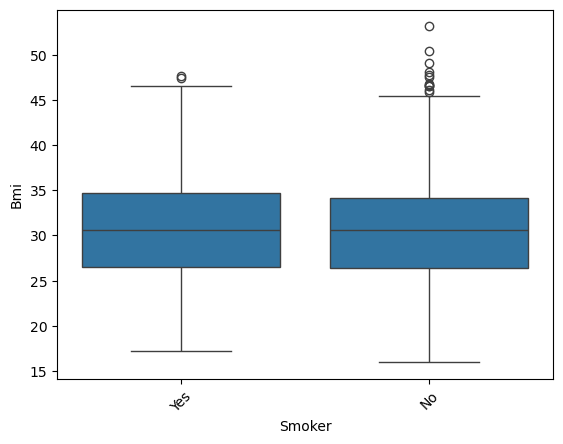

In [118]:
sns.boxplot(x=df_i["Smoker"], y=df_i["Bmi"])
plt.xticks(rotation=45)
plt.show()

# We can see a lot of outliers in this data, we can't really conclude anything. Inferential statistics must take place

## 4. Data Merging

- [x] **Prepare a larger dataset for future analysis. Stack the two datasets by rows.**

In [188]:
df_v["Charges"] = None  # Add a placeholder for "charges" in df_v

df = pd.concat([df_i, df_v], ignore_index=True)

df.drop(columns="Charges", inplace=True)

df["Charges (In American Dollars)"].fillna(df_i["Charges (In American Dollars)"].mean(), inplace=True)


df

C:\Users\micro\AppData\Local\Temp\ipykernel_4680\1631572809.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Charges (In American Dollars)"].fillna(df_i["Charges (In American Dollars)"].mean(), inplace=True)


,Age,Gender,Bmi,Children,Smoker,Region,Charges (In American Dollars)
0,19.0,Female,27.900000,0.0,Yes,Southwest,16884.924000
1,18.0,Male,33.770000,1.0,No,Southeast,1725.552300
2,28.0,Male,33.000000,3.0,No,Southeast,4449.462000
3,33.0,Male,22.705000,0.0,No,Northwest,21984.470610
4,32.0,Male,28.880000,0.0,No,Northwest,3866.855200
...,...,...,...,...,...,...,...
1383,58.0,Male,36.955000,2.0,Yes,Northwest,13286.594477
1384,92.0,Male,84.973279,11.0,Yes,Southwest,13286.594477
1385,19.0,Male,44.880000,0.0,Yes,Southeast,13286.594477
1386,61.0,Male,33.915000,0.0,No,Northeast,13286.594477


# Data Science (Using the Pandas Library)

## 5. Inferential Statistics

- [x] **Use the describe statement to check the statistics of each column**

In [16]:
df_i["age"].describe()
df_v["age"].describe()

count    50.000000
mean     46.820000
std      21.681074
min      18.000000
25%      28.000000
50%      44.500000
75%      60.750000
max      92.000000
Name: age, dtype: float64

- [x] **Create a correlation matrix for all of the numerical columns**

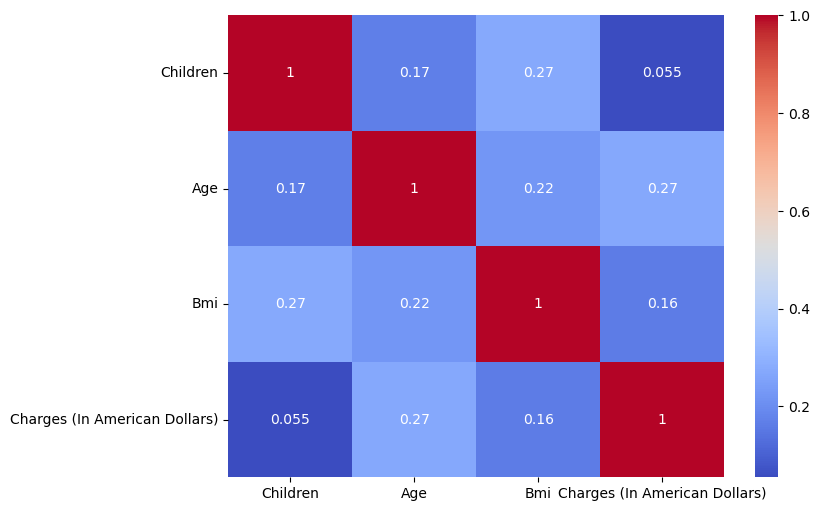

In [196]:
X = df[["Children","Age","Bmi","Charges (In American Dollars)"]]

plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.show()

# We have weak correlations between different numerical columns,
# but they're all positive, so if one increases, the other one grows as well

- [x] **Do smokers typically have increased charges? Perform a Welch's t-test.**

- $H_0$: Smoking does not affect medical charges.

- $H_a$: Smokers have higher medical charges than non-smokers.

In [201]:
from scipy.stats import ttest_ind

smokers = df[df["Smoker"] == "Yes"]["Charges (In American Dollars)"]  # charges of smokers
non_smokers = df[df["Smoker"] == "No"]["Charges (In American Dollars)"]  # charges of non-smokers

t_stat, p_value = ttest_ind(smokers, non_smokers, equal_var=False)  
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# p_value < 0.05, hence we reject H_0 and conclude that smoking significantly increases medical charges.

T-statistic: 25.783072523725533, P-value: 2.1143225605031822e-82


- [x] **Do men and women have different average BMI? Perform a Welch's t-test.**

- $H_0$: There is no significant difference in BMI between males and females.

- $H_a$: There is a significant difference in BMI between males and females.

In [207]:
from scipy.stats import ttest_ind

males = df[df["Gender"] == "Male"]["Bmi"]
females = df[df["Gender"] == "Female"]["Bmi"]

t_stat, p_value = ttest_ind(males, females, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# p_value > 0.05, hence BMI doesn't really differ between genders. We fail to reject H_0.

T-statistic: 1.192784245251136, P-value: 0.2331580981387531


- [x] **Do insurance charges differ across different regions? Use a one-way ANOVA.**

- $H_0$: Charges do not vary between regions.

- $H_a$: At least one region has a different mean charge.

In [213]:
from scipy.stats import f_oneway

southeast = df[df["Region"] == "Southeast"]["Charges (In American Dollars)"]
southwest = df[df["Region"] == "Southwest"]["Charges (In American Dollars)"]
northeast = df[df["Region"] == "Northeast"]["Charges (In American Dollars)"]
northwest = df[df["Region"] == "Northwest"]["Charges (In American Dollars)"]

f_stat, p_value = f_oneway(southeast, southwest, northeast, northwest)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# p_value < 0.05 hence, we reject H_0 and ascertain that at least one region has significantly different charges.

F-statistic: 3.3300417700351006, P-value: 0.018927975034847735


- [x] **How do age, BMI, and smoking affect medical charges? Use a multiple Linear Regression.**

In [217]:
import statsmodels.api as sm

df["Smoker_Num"] = df["Smoker"].map({"Yes": 1, "No": 0})  # Convert to numeric
X = df[["Age", "Bmi", "Smoker_Num"]]  # Independent variables
X = sm.add_constant(X)  # Add intercept
y = df["Charges (In American Dollars)"]  # Dependent variable

model = sm.OLS(y, X).fit()
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     Charges (In American Dollars)   R-squared:                       0.584
Model:                                       OLS   Adj. R-squared:                  0.583
Method:                            Least Squares   F-statistic:                     648.4
Date:                           Mon, 31 Mar 2025   Prob (F-statistic):          3.75e-263
Time:                                   22:08:47   Log-Likelihood:                -14353.
No. Observations:                           1388   AIC:                         2.871e+04
Df Residuals:                               1384   BIC:                         2.873e+04
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

- [x] **Is smoking dependent on gender? Use a Chi-Squared test.**

- $H_0$: Smoking is independent of gender.

- $H_a$: Smoking is somewhat dependent on gender.

In [223]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["Gender"], df["Smoker"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square: {chi2}, P-value: {p_value}")

# p_value < 0.05 hence, we reject H_0 and ascertain that smoking and gender have a relationship

Chi-square: 4.609378842426379, P-value: 0.03179754907899053


## 6. PCA (Principal Component Analysis)

- [x] **Use a PCA to check how many dimensions are needed to retain most of the data's variance?**

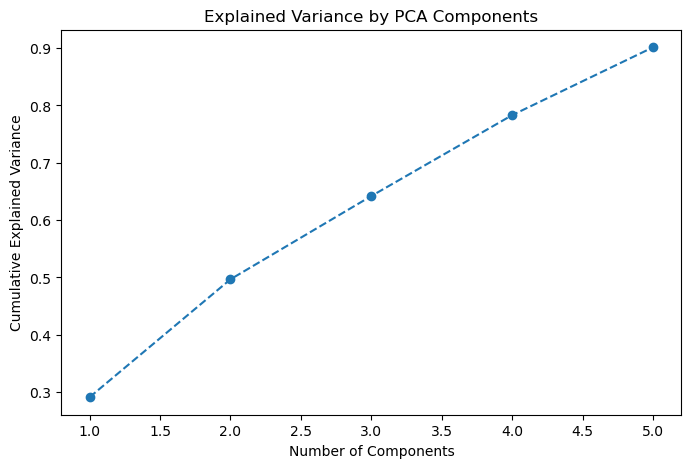

[0.29086663 0.20584009 0.14536297 0.14125756 0.11838145]


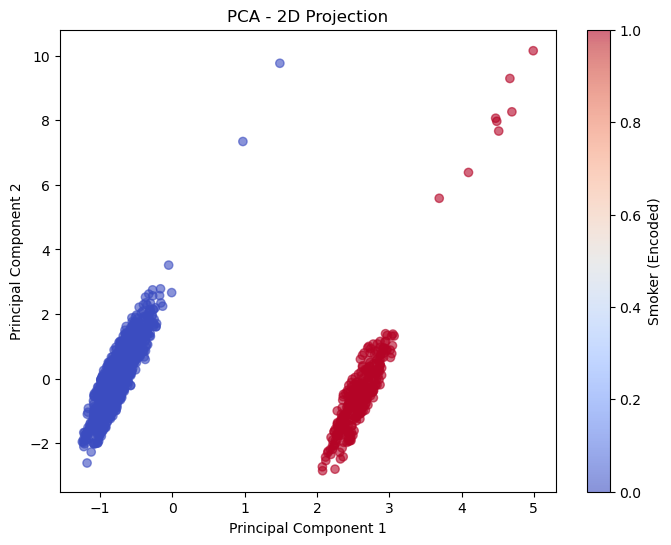

In [233]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_pca = df.copy()  

encoder = LabelEncoder()
for col in ["Gender", "Smoker", "Region"]:
    df_pca[col] = encoder.fit_transform(df_pca[col])

scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca.drop(columns=["Charges (In American Dollars)"]))  # Exclude charges if focusing on features only


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=5)  
df_pca_reduced = pca.fit_transform(df_pca_scaled)


explained_variance = np.cumsum(pca.explained_variance_ratio_)


plt.figure(figsize=(8,5))
plt.plot(range(1, 6), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()


print(pca.explained_variance_ratio_)


pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_pca_scaled)

plt.figure(figsize=(8,6))
plt.scatter(df_pca_2d[:,0], df_pca_2d[:,1], c=df_pca["Smoker"], cmap='coolwarm', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Projection")
plt.colorbar(label="Smoker (Encoded)")
plt.show()


### Model's conclusions

- From the PCA graph, we see to clearly different clumps of data, so the PCA has effectively separated smokers and non-smokers into distinct clusters;

- For models that predict charges, smoking is likely a key predictor since it contributes heavily to variance

- No single feature dominates the dataset → PC1 explains 29.1% of the variance, meaning multiple factors contribute to the data.

- 2D PCA captures about 50% of the information → The separation seen in the scatter plot is meaningful but not perfect.

- Keeping 3–5 principal components retains most of the data → PC1–PC5 explain 90.1% of the variance, making PCA useful for dimensionality reduction.

- PC1 likely captures smoking status or a key health factor → The strong separation suggests that one main variable (e.g., smoking, BMI) is driving the patterns.

## 7. Random Forest

- [x] **Use a Random Forest model, coupled with feature importance, to help us understand which features (columns) in this dataset contribute the most to the charges.**

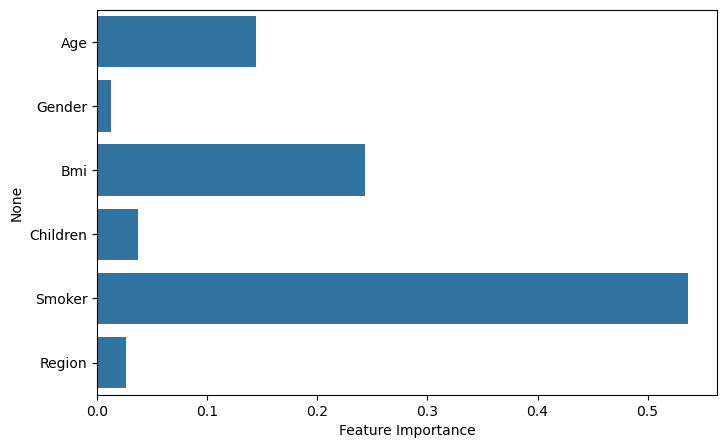

In [268]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

df_temp = df_i.copy()
df_temp.dropna(inplace=True)

encoder = LabelEncoder()
for col in ["Gender", "Smoker", "Region"]:
    df_temp[col] = encoder.fit_transform(df_temp[col])

X = df_temp.drop(columns=["Charges (In American Dollars)"])
y = df_temp["Charges (In American Dollars)"]

model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.xlabel("Feature Importance")
plt.show()


### Model's conclusions

- Smoking has the strongest influence on insurance charges. This makes sense because smokers typically pay much higher premiums due to increased health risks.
  
- Higher BMI may increase charges, but it’s not as significant as smoking. This suggests that insurance companies weigh smoking more heavily than weight-related risks.

- Even though we expect age to be significant, insurers likely adjust premiums based on smoking status first.


## 8. KMeans Clustering

- [x] **Use KMeans Clustering to check if we can group individuals into distinct clusters based on their health and insurance data (Age, Bmi, Children, Charges (In American Dollars))?**

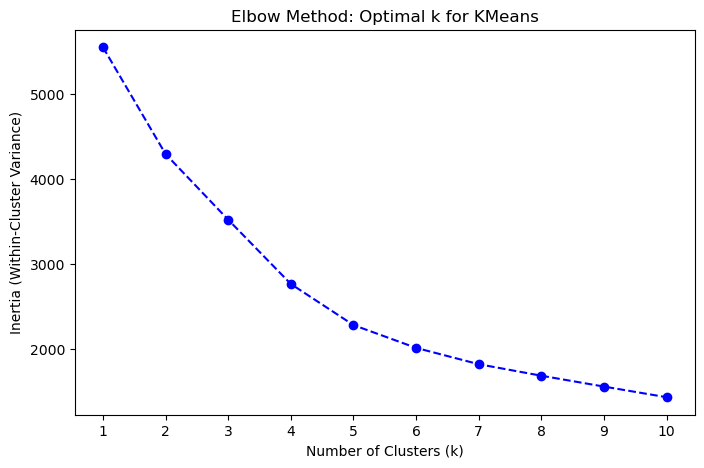

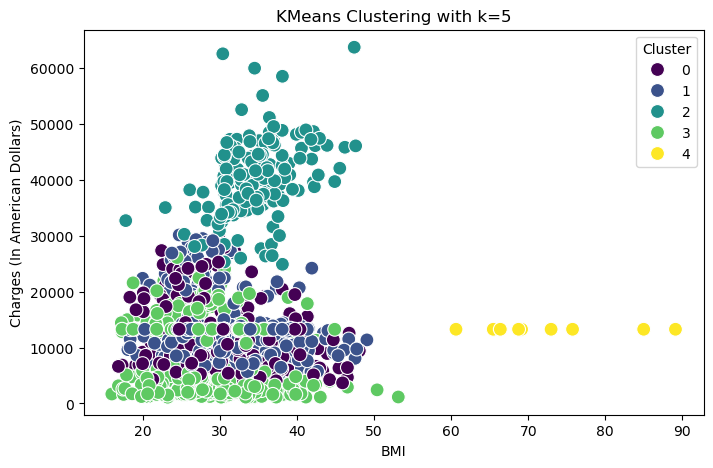

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[["Age", "Bmi", "Children", "Charges (In American Dollars)"]]  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init avoids warnings
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker="o", linestyle="--", color="b")
plt.title("Elbow Method: Optimal k for KMeans")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Variance)")
plt.xticks(range(1, 11))
plt.show()

# The graph shows us that the elbow is in k=5

k = 5
km = KMeans(n_clusters=k, random_state=42, n_init=10)
df["Cluster"] = km.fit_predict(X_scaled)


plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Bmi"], y=df["Charges (In American Dollars)"], hue=df["Cluster"], palette="viridis", s=100)
plt.title(f"KMeans Clustering with k={k}")
plt.xlabel("BMI")
plt.ylabel("Charges (In American Dollars)")
plt.legend(title="Cluster")
plt.show()

- [x] **Let's try a silhouette score since the clusters aren't very well separated.**

In [265]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df["Cluster"])

print(f"Silhouette Score for k=5: {score:.4f}")

Silhouette Score for k=5: 0.2869


### Model's conclusions

- Clusters exist, but they are not completely distinct. The features chosen for clustering (e.g., Age, BMI, Charges) do not fully separate the groups, hence why some people have mixed characteristics.
  
- Performing the silhouette score shows us how well the clusters are separated, and a score above 0.5 is ideal, whereas between 0.2 and 0.5 means that clusters exist but they're not well separated.

## 9. Logistic Regression

 - [x] **Use a logistic regression model to see if we can predict if a person is a smoker based on their age, BMI, and charges.**

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00        71

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278



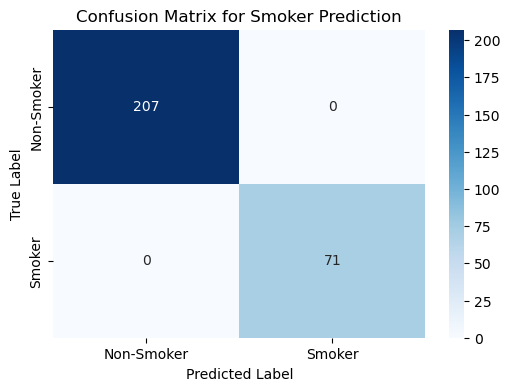

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df_logistic = df.copy()
encoder = LabelEncoder()  # encode the variables that aren't numerical values

for col in ["Gender", "Smoker", "Region"]:
    df_logistic[col] = encoder.fit_transform(df_logistic[col])

X = df_logistic.drop(columns=["Smoker"])  
y = df_logistic["Smoker"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

c_m = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(c_m, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Smoker", "Smoker"], yticklabels=["Non-Smoker", "Smoker"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Smoker Prediction")
plt.show()

- [x] **Let's run a cross-validation since the model is running suspiciously well.**

In [283]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


### Model's conclusions

- 100% accuracy in real-world data is rare, raising concerns about data leakage or overly easy classification due to strong feature separation (e.g., BMI, charges).

- However, cross-validation confirmed the model's performance across different splits, suggesting it generalizes well and isn't overfitting.

- The perfect confusion matrix and high feature importance of "Smoker" indicate smoking status is a strong and predictable feature.

## 10. Gradient Boost

- [x] **Use a gradient boost model to further confirm if we can predict if a person is a smoker based on their age, BMI, and charges.**

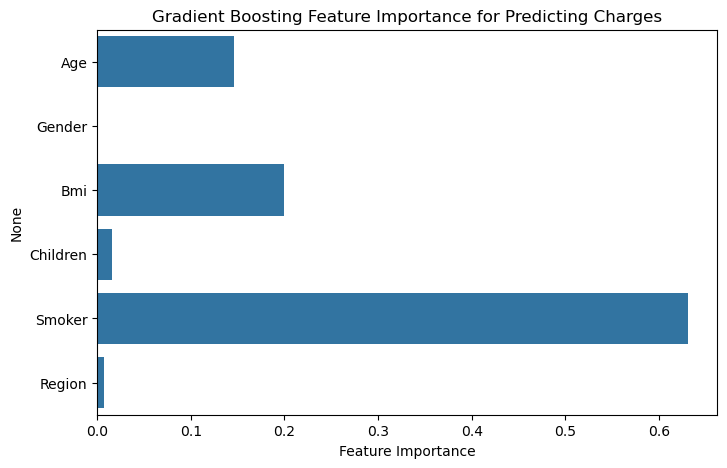

In [291]:
# Since Gradient Boosting is an ensemble method,
# it will typically produce a stronger model that may outperform logistic regression.

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


df_temp = df.copy()

encoder = LabelEncoder()
for col in ["Gender", "Smoker", "Region"]:
    df_temp[col] = encoder.fit_transform(df_temp[col])

X = df_temp.drop(columns=["Charges (In American Dollars)","Smoker_Num","Cluster"])
y = df_temp["Charges (In American Dollars)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance for Predicting Charges")
plt.show()



### Model's conclusions

- After doing this feature importance, it's very clear that the  smoking status is the dominant factor in predicting charges.

- [x] **Now, use a Gradient Boosting Classifier model to further vindicate the previously obtained result.**

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       207
           1       0.81      0.72      0.76        71

    accuracy                           0.88       278
   macro avg       0.86      0.83      0.84       278
weighted avg       0.88      0.88      0.88       278



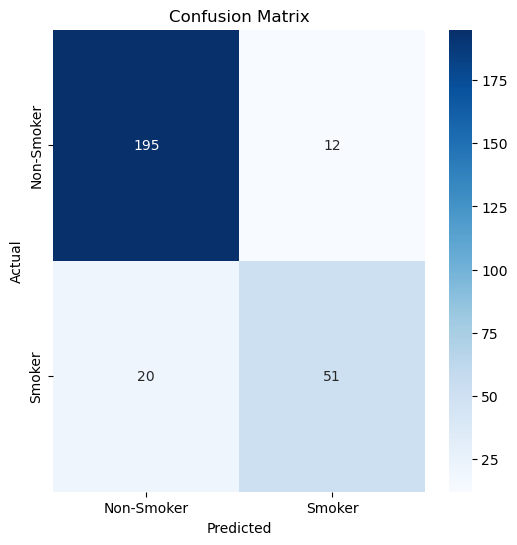

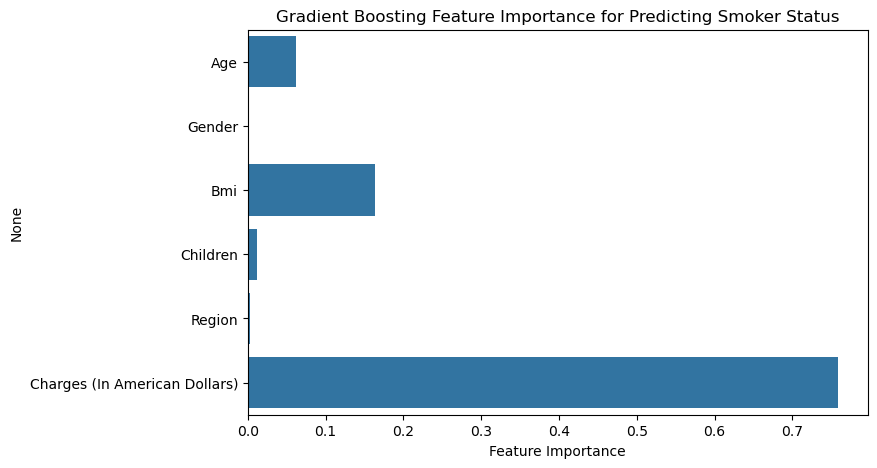

In [296]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


df_temp = df.copy()

encoder = LabelEncoder()
for col in ["Gender", "Smoker", "Region"]:
    df_temp[col] = encoder.fit_transform(df_temp[col])

X = df_temp.drop(columns=["Smoker","Smoker_Num","Cluster"])
y = df_temp["Smoker"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Smoker", "Smoker"], yticklabels=["Non-Smoker", "Smoker"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance for Predicting Smoker Status")
plt.show()


### Model's conclusions

- The model achieved 88% accuracy in predicting smoker vs. non-smoker status.

- The model performs well for non-smokers with high precision (91%) and recall (94%).

- The model struggles a bit with smokers, showing lower recall (72%) and F1-score (0.76), meaning it misses some smokers (false negatives).

- The model correctly classifies 195 non-smokers and 51 smokers, but misses 20 smokers as non-smokers (false negatives).

- As expected, the charges and the smoker status are the most related to one another. 

# Transfering the data to MySQL

- [x] **Save the original dataset with fixed columns**

In [ ]:
df_i = pd.read_csv("insurance.csv")

df_i.rename(columns={"Charges (in American dollars)": "Charges_in_dollars"}, inplace=True)

df_i.to_csv("SQL_insurance.csv", index=False)

# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work


- [x] **Save the clean dataset**

In [ ]:
df_i = pd.read_csv("clean_insurance.csv")

df_i.rename(columns={"Charges (in American dollars)": "Charges_in_dollars"}, inplace=True)

df_i.to_csv("SQL_clean_insurance.csv", index=False)

# If this downloads as an xls file, go on Google and search for "xls to csv|Cloud convert" and convert that file to csv, it should work
